In [1]:
#note: you will need to create two new folders in data: test_images and sized_images

import pandas as pd
import time
import os, requests
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

In [2]:
#formula to turn the latex equations into png images
def formula_as_file( formula, file, negate=False ):
    tfile = file
    if negate:
        tfile = 'tmp.png'
    r = requests.get( 'http://latex.codecogs.com/png.latex?\dpi{150} %s' % formula )
    f = open( tfile, 'wb' )
    f.write( r.content )
    f.close()
    if negate:
        os.system( 'convert tmp.png -channel RGB -negate -colorspace rgb %s' %file )

In [3]:
#read in the csvs obtained from 03_tags_clustering
chem = pd.read_csv("../data/equation/chemistry_post_eq_tag_id.csv", lineterminator='\n')
physics = pd.read_csv("../data/equation/physics_post_eq_tag_id.csv", lineterminator='\n')
bio = pd.read_csv("../data/equation/biology_post_eq_tag_id.csv", lineterminator='\n')

In [4]:
print(chem.shape[0])
print(physics.shape[0])
print(bio.shape[0])

65085
444180
12571


In [5]:
#eliminate nan values
chem.dropna(subset = ['Equation'], inplace = True)
bio.dropna(subset = ['Equation'], inplace = True)
physics.dropna(subset = ['Equation'], inplace = True)

In [6]:
#eliminate equations 2 characters or less and eliminate 64 characters or more
bio = bio[bio.apply(lambda row: len(row.Equation) > 2 and len(row.Equation) < 64, axis = 1)]
chem = chem[chem.apply(lambda row: len(row.Equation) > 2 and len(row.Equation) < 64, axis = 1)]
physics = physics[physics.apply(lambda row: len(row.Equation) > 2 and len(row.Equation) < 64, axis = 1)]

In [7]:
chem.head()

,Equation,Label,Cluster_label,Id,Tags
0,\mathrm{NaCl},chemistry,chemistry-everything-else,2,<ions><crystal-structure><ionic-compounds><sol...
1,\mathrm{Cl},chemistry,chemistry-everything-else,2,<ions><crystal-structure><ionic-compounds><sol...
2,\mathrm{Cl^-},chemistry,chemistry-everything-else,2,<ions><crystal-structure><ionic-compounds><sol...
3,\mathrm{Na},chemistry,chemistry-everything-else,2,<ions><crystal-structure><ionic-compounds><sol...
4,\mathrm{Na^+},chemistry,chemistry-everything-else,2,<ions><crystal-structure><ionic-compounds><sol...


In [10]:
bio.drop_duplicates(['Equation', 'Label', 'Cluster_label'], inplace = True)
chem.drop_duplicates(['Equation', 'Label', 'Cluster_label'], inplace = True)
physics.drop_duplicates(['Equation', 'Label', 'Cluster_label'], inplace = True)

In [11]:
#eliminate all \ce formatted chemical equations
bio = bio[~bio.Equation.str.contains("ce{")]
chem = chem[~chem.Equation.str.contains("ce{")]
physics = physics[~physics.Equation.str.contains("ce{")]

In [15]:
bio.reset_index(drop = True, inplace = True)
chem.reset_index(drop = True, inplace = True)
physics.reset_index(drop = True, inplace = True)

In [12]:
print(len(bio.index))
print(len(chem.index))
print(len(physics.index))

5219
18116
200396


# chemistry

In [16]:
#generate chem filenames
chem_lst = []
_ = chem.apply(lambda row: [chem_lst.append(str(row.name) + "_" + str(row["Label"]) + "_" + str(row["Id"]))], axis=1)
chem["FileName"] = chem_lst

/Users/shuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
#save chem equation images
start = time.time()
for i, row in chem.iterrows():
    filename = "../data/test_images/" + row.FileName + ".png"
    formula_as_file(row.Equation, filename)
end = time.time()
print((end-start)/60.0)

# biology

In [44]:
#generate bio filenames
bio_lst = []
_ = bio.apply(lambda row: [bio_lst.append(str(row.name) + "_" + str(row["Label"]) + "_" + str(row["Id"]))], axis=1)
bio["FileName"] = bio_lst

In [45]:
bio.head()

,Equation,Label,Cluster_label,Id,Tags,FileName
0,v = 6d,biology,biology,424,<human-biology><neuroscience>,0_biology_424
1,v = \sqrt{\frac{i_\text{Na max}}{r_i c_m^2 V_\...,biology,biology,424,<human-biology><neuroscience>,1_biology_424
2,V_d=k\frac{\large a.([C_2]-[C_1])}{\large l},biology,biology,1000,NaN,2_biology_1000
3,"counts, mids=h",biology,biology,1207,NaN,3_biology_1207
4,even &lt;- (df,biology,biology,1207,NaN,4_biology_1207


In [46]:
#save bio equation images
start = time.time()
for i, row in bio.iterrows():
    filename = "../data/test_images/" + row.FileName + ".png"
    formula_as_file(row.Equation, filename)
end = time.time()
print((end-start)/60.0)

10.473268934090932


# physics

In [ ]:
#generate physics filenames
phys_lst = []
_ = physics.apply(lambda row: [phys_lst.append(str(row.name) + "_" + str(row["Label"]) + "_" + str(row["Id"]))], axis=1)
physics["FileName"] = phys_lst


In [ ]:
# physics_idx = np.random.choice(physics.shape[0], 4600, replace = False)

In [ ]:
#save 4600 physics equation images
start = time.time()
for i, row in physics.iterrows():
    filename = "../data/test_images/" + physics.iloc[i].FileName + ".png"
    formula_as_file(physics.iloc[i].Equation, filename)
end = time.time()
print((end-start)/60.0)

In [ ]:
physics.iloc[190727].FileName

In [ ]:
physics.iloc[190727].Equation

In [ ]:
filename = "../data/test_images/" + physics.iloc[190727].FileName + ".png"
formula = physics.iloc[190727].Equation
formula_as_file(formula, filename)

In [ ]:
filename

In [ ]:
img = Image.open(filename)
plt.imshow(np.asarray(img))

Time to get statistics!

In [ ]:
#read image width/height into a dataframe
image_data = pd.DataFrame(columns=["width", "height"])
for file in os.listdir("../data/test_images"):
    if file.endswith(".png"):
        img = "../data/test_images/" + file
        im = Image.open(img)
        size = list(im.size)
        insert = pd.DataFrame([[float(size[0])] + [float(size[1])]], columns=["width", "height"])
        image_data = image_data.append(insert, ignore_index=True)

In [ ]:
image_data.describe()

Below are several test images with different cropping methods to get (128, 32) images

In [28]:
small = Image.open("../data/test_images/12_chemistry_27.png")
small.size

(32, 22)

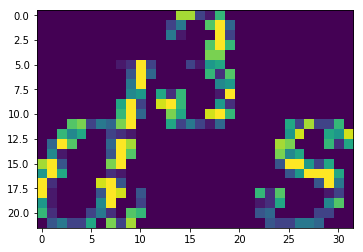

In [34]:
plt.imshow(np.asarray(small))

In [33]:
big = Image.open("../data/test_images/5_chemistry_4.png")
big.size

(234, 23)

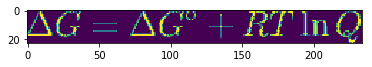

In [35]:
plt.imshow(np.asarray(big))

In [53]:
#this image is smaller than (128, 32).  We expand it.
delta_w = 128 - small.size[0]
delta_h = 32 - small.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_small = ImageOps.expand(small, padding)

In [54]:
new_small.size

(128, 32)

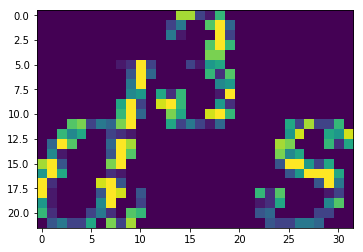

In [55]:
plt.imshow(np.asarray(small))

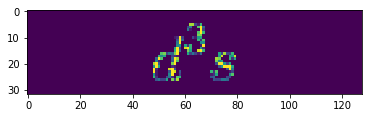

In [56]:
plt.imshow(np.asarray(new_small))

In [57]:
#This image is too big. We crop too-big image as-is
delta_w = 128 - big.size[0]
delta_h = 32 - big.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_big = ImageOps.expand(big, padding)

In [ ]:
#Alternate method: resize width to 128, then crop
new_size = tuple([128, big.size[1]])
new_big1 = big.resize(new_size, Image.ANTIALIAS)

delta_w = 0
delta_h = 32 - new_big1.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_big1 = ImageOps.expand(new_big1, padding)
new_big1.size


In [ ]:
plt.imshow(np.asarray(big))

In [ ]:
plt.imshow(np.asarray(new_big))

In [ ]:
plt.imshow(np.asarray(new_big1))

In [ ]:
#Here's a place to experiment with different image files

#test = Image.open("../data/test_images/56_biology_3869.png")
test = Image.open("../data/test_images/1351_biology_16249.png")
print(test.size)
plt.imshow(np.asarray(test))

In [ ]:
#crop too-big image
delta_w = 128 - test.size[0]
delta_h = 32 - test.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_test = ImageOps.expand(test, padding)
plt.imshow(np.asarray(new_test))

In [36]:
test = big

In [47]:
#resize width to 128, then crop
new_size = tuple([128, test.size[1]])
new_img = test.resize(new_size, Image.LANCZOS)
delta_w = 0
delta_h = 64 - new_img.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_img = ImageOps.expand(new_img, padding)

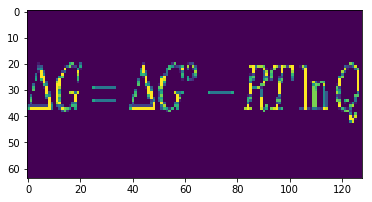

In [48]:
plt.imshow(np.asarray(new_img))

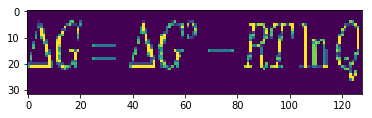

In [43]:
#resize width to 128, then crop
new_size = tuple([128, test.size[1]])
new_img = test.resize(new_size, Image.LANCZOS)
delta_w = 0
delta_h = 32 - new_img.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_img = ImageOps.expand(new_img, padding)
plt.imshow(np.asarray(new_img))

let's actually do the resizing

In [ ]:
#resize and save all images in parallel
def img_resize(file):
    if file.endswith(".png"):
        filename = "../data/test_images/" + file
        img = Image.open(filename)
        new_size = tuple([128, img.size[1]])
        new_img = test.resize(new_size, Image.ANTIALIAS)
        delta_w = 0
        delta_h = 32 - new_img.size[1]
        padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
        new_img = ImageOps.expand(new_img, padding)
        if new_img.size != (128, 32):
            print("NOOOOOOO")
            return
        destination = "../data/sized_images/" + file
        new_img.save(destination)

In [ ]:
start = time.time()
with ThreadPoolExecutor(max_workers=8) as executor:
    [executor.submit(img_resize, file) for file in os.listdir("../data/test_images")]
end = time.time()
print((end-start)/60.0)